# Scenario discovery

This notebook is used to do scenario discovery. Results of this discovery are saved.

Input: None

Output: ANALYSIS_results\01_model_run.tar.gz

In [ ]:
import pandas as pd
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting
from ema_workbench import (RealParameter, ScalarOutcome, Constant,
                           Model, MultiprocessingEvaluator, SequentialEvaluator, ema_logging,
                           perform_experiments, Policy, Scenario)
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
from ema_workbench import Constraint
from ema_workbench.util.utilities import (save_results, load_results)
import seaborn as sns

In [2]:
# define problem formulation
model, functions = get_model_for_problem_formulation(2)

In [3]:
# use lhs sampling to sample uncertainties and run model
ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=500,               
                                            policies=100,
                                            uncertainty_sampling='lhs')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 500 scenarios * 100 policies * 1 model(s) = 50000 experiments
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] 15000 cases completed
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] 25000 cases completed
[MainProcess/INFO] 30000 cases completed
[MainProcess/INFO] 35000 cases completed
[MainProcess/INFO] 40000 cases completed
[MainProcess/INFO] 45000 cases completed
[MainProcess/INFO] 50000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [11]:
# save results for later
save_results(results, "..\ANALYSIS_results\01_model_run.tar.gz")


[MainProcess/INFO] results saved successfully to /home/mssalesnl/assignment/..\ANALYSIS_results_model_run.tar.gz


In [12]:
# load older results
results = load_results("..\ANALYSIS_results\01_model_run.tar.gz")

[MainProcess/INFO] results loaded succesfully from /home/mssalesnl/assignment/..\ANALYSIS_results_model_run.tar.gz


[MainProcess/INFO] no time dimension found in results


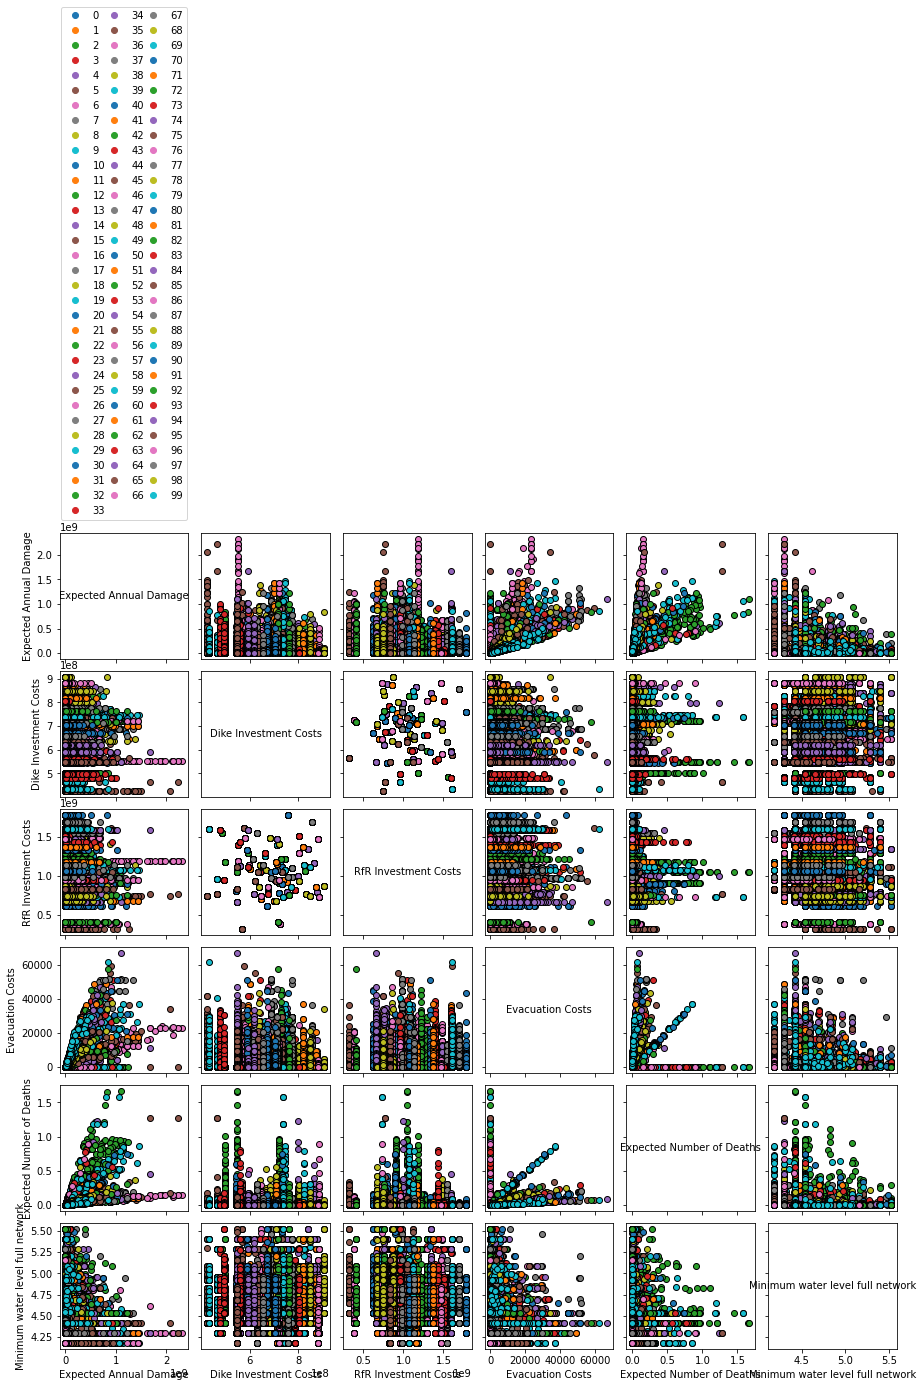

In [14]:
import matplotlib.pyplot as plt
fig, axes = pairs_plotting.pairs_scatter(results[0], results[1], group_by='policy',
                                         legend=True)
fig.set_size_inches(15,15)
plt.show()

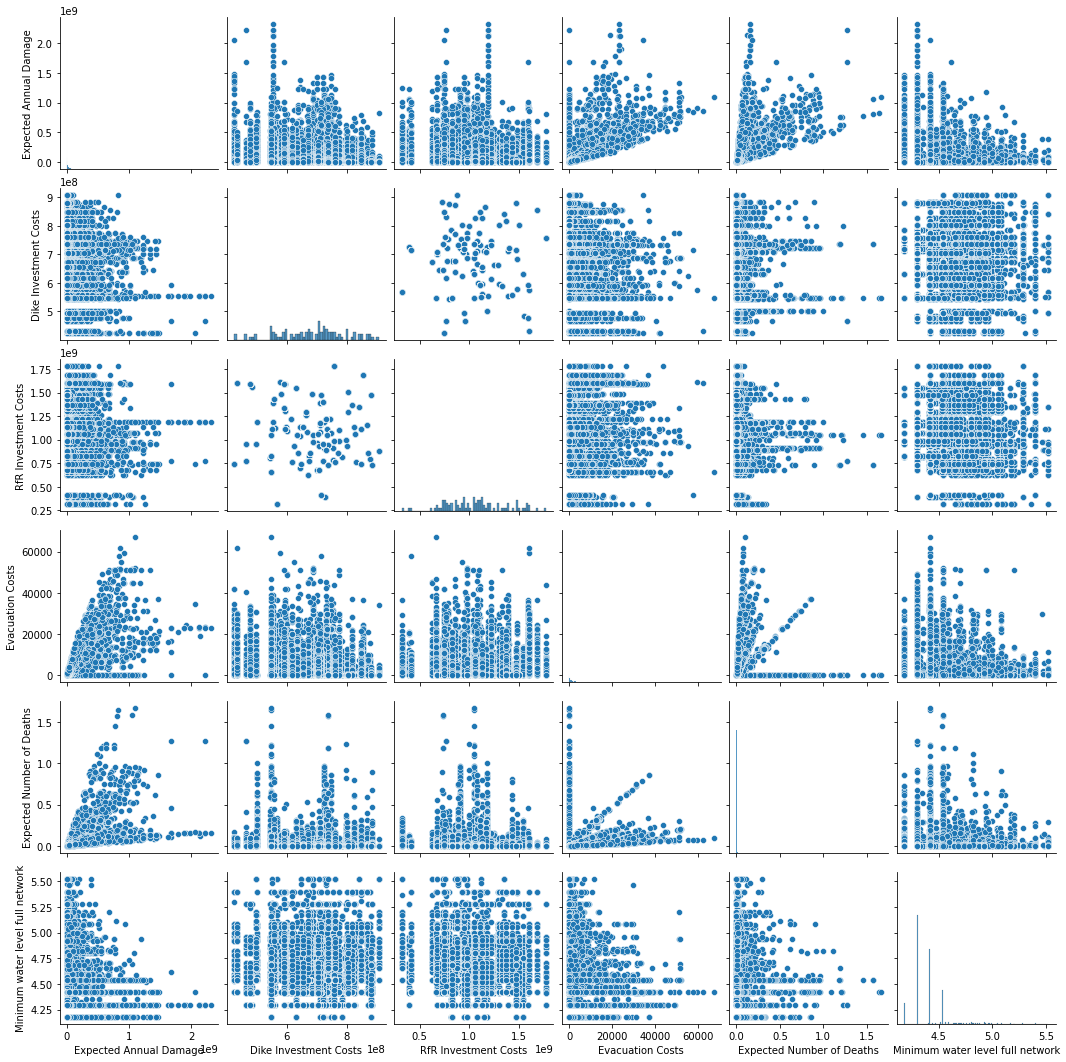

In [15]:
sns.pairplot(pd.DataFrame(results[1]))